-------------------------------------

In [234]:
#!pip install apimoex

In [237]:
import requests
import numpy as np
import apimoex
import pandas as pd

stock_quotes = ['GAZP', 'YNDX', 'RUAL', 'IRAO', 'GMKN', 'LKOH', 'MGNT', 'MTSS', 'NVTK', 'PLZL', 'ROSN', 'SBER',
               'SNGS', 'TATN','CHMF']
for elem in stock_quotes:
    with requests.Session() as session:
        if elem == 'GAZP':
            data = apimoex.get_board_history(session, elem)
            df = pd.DataFrame(data)
            df.rename(columns = {'CLOSE':elem}, inplace = True)
            df = df[['TRADEDATE', elem]]
        else:
            data = apimoex.get_board_history(session, elem)
            df_2 = pd.DataFrame(data)
            df_2.rename(columns = {'CLOSE':elem}, inplace = True)
            df_2 = df_2[elem]
            df = pd.concat([df, df_2], axis=1)


In [238]:
#df.set_index('TRADEDATE', inplace=True)
df = df.dropna()
df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
df['time_delta'] = df['TRADEDATE'].diff()
df

,TRADEDATE,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF,time_delta
39,2014-08-05,126.57,1087.7,29.000,0.011794,6856.0,2045.5,7400.0,288.00,307.00,488.0,220.00,108.90,25.365,201.40,333.1,NaT
42,2014-08-08,126.55,1094.6,28.750,0.011534,6883.0,2006.1,7529.5,282.96,293.00,489.1,219.54,102.97,25.269,207.99,334.1,3 days
62,2014-09-05,139.00,1087.6,28.730,0.010855,7521.0,1790.4,8197.3,324.00,349.00,499.2,238.00,88.66,26.766,208.21,369.0,28 days
63,2014-09-08,139.00,1116.8,28.550,0.010745,7510.0,1820.0,8152.0,324.24,323.02,500.0,234.02,89.74,26.526,209.05,366.0,3 days
64,2014-09-09,139.02,1119.0,27.180,0.010500,7393.0,1865.0,8400.1,327.92,311.50,499.4,234.55,92.67,26.811,211.25,366.1,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2023-01-06,162.10,1832.0,40.540,3.490000,15438.0,7441.5,5285.0,283.25,1856.40,7905.0,367.30,369.99,21.685,490.80,884.4,1 days
2165,2023-01-09,162.71,1867.0,40.665,2.952000,15370.0,7440.5,5210.0,284.45,1829.60,7845.0,367.95,372.16,21.620,492.00,872.6,3 days
2166,2023-01-10,162.10,1855.4,40.275,3.273500,15324.0,7323.5,5182.0,289.75,1806.80,7876.0,366.75,371.36,21.470,499.10,863.6,1 days
2168,2023-01-12,164.17,1866.8,39.995,2.043000,15440.0,7272.5,5227.5,293.45,1804.80,7934.0,346.85,356.14,21.675,498.50,880.4,2 days


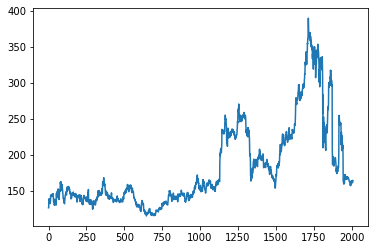

In [239]:
plt.plot(list(df['GAZP']))